In [25]:
from keras import datasets

mnist=datasets.mnist
(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [26]:
train_data=train_data/255.0
test_data=test_data/255.0

img_size=28

train_data=train_data.reshape(train_data.shape[0],img_size,img_size,1)
test_data=test_data.reshape(test_data.shape[0],img_size,img_size,1)

num_classes=10
from keras.utils import to_categorical

train_target=to_categorical(train_target,num_classes)

print(train_target[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape=train_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #flatten the 2D into 1D layer
model.add(Dense(64))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history=model.fit(train_data,train_target,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1486 - acc: 0.9546
Epoch 2/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0506 - acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0387 - acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0308 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0253 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0211 - acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0172 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0157 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0128 - acc: 0.9960
Epoch 10/10
60000/60000 [===========================

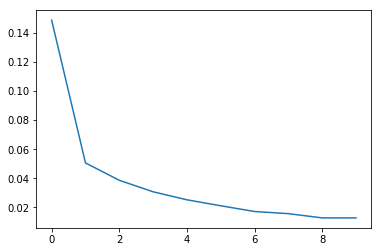

In [30]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

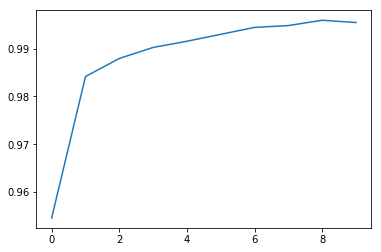

In [32]:
plt.plot(history.history['acc'])